In [15]:
import pandas as pd
import numpy as np
from DbConn import *
plt.style.us

In [16]:
db= DbConn()

In [17]:
sql='''
select 
CASE WHEN audiacc > 10000000 THEN 1 
when audiacc > 2600000 then 2
when audiacc > 680000 then 3
when audiacc > 130000 then 4
when audiacc > 30000 then 5
ELSE 6 END AUDIACC_GRADE, origin.*
from (
    SELECT b.*, m.MOVIENM , m.SHOWTM , m.NATIONS , m.GENRENM , m.DIRECTORS , m.AUDITS , m.COMPANYCD1
    FROM MOVIEDETAIL m JOIN (
    SELECT MOVIECD , MAX(AUDIACC) as audiacc
    FROM BOXOFFICE b2 GROUP BY MOVIECD 
    ) b ON m.MOVIECD = b.MOVIECD
) origin
'''

In [18]:
query_cor = pd.read_sql(sql,db.connection)

In [19]:
db.disconnect()

In [20]:
query_cor.keys()

Index(['AUDIACC_GRADE', 'MOVIECD', 'AUDIACC', 'MOVIENM', 'SHOWTM', 'NATIONS',
       'GENRENM', 'DIRECTORS', 'AUDITS', 'COMPANYCD1'],
      dtype='object')

In [21]:
cor1=query_cor[['NATIONS','AUDIACC_GRADE']]

In [22]:
cor1.head()

,NATIONS,AUDIACC_GRADE
0,미국,5
1,캐나다,5
2,한국,3
3,한국,4
4,프랑스,6


In [23]:
#산점도 작성
import matplotlib.pyplot as plt

%matplotlib inline


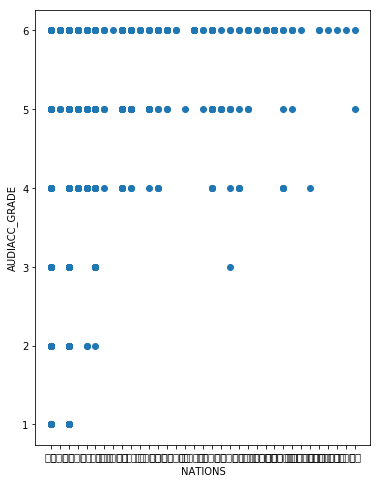

In [25]:
plt.figure(figsize=(6,8)) #플롯 사이즈 지정
plt.scatter(cor1.NATIONS,cor1.AUDIACC_GRADE)#산점도
plt.xlabel('NATIONS')#x축 레이블 지정
plt.ylabel('AUDIACC_GRADE')#y축 레이블 지정
plt.grid#플롯에 격자 보이도록
plt.show()#플롯보이기

In [26]:
import seaborn as sns

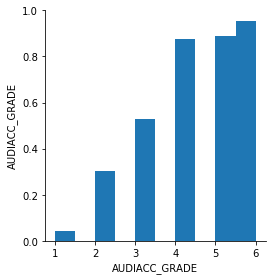

In [27]:
sns.pairplot(cor1,kind='reg',height=4)# 페어플롯 작성